# Object creation (2024-01-26)

In [1]:
import numpy as np
import pandas as pd

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.571390,-1.937381,0.097816,1.674845
2013-01-02,0.533543,-0.141807,-0.632178,1.577166
2013-01-03,0.252178,0.170380,-1.236077,-0.817478
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444
2013-01-05,0.415270,-0.201381,0.713818,-0.643521
2013-01-06,-1.095975,-1.344845,0.176951,-2.000458


In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1,index=list(range(4)),dtype="float32"),
        "D": np.array([3]*4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo", #특이한게 ,로 끝내도 되고 아닌 것으로 끝내도 되네?
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
#df2.<TAB> # noqa: E225, E999

#df2.까지 입력후 탭누르라는 의미, vscode에서는 탭안눌러도 자동으로 표시 단 컬럼은 안 표시됨

# Viewing data (2024-01-27)

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.571390,-1.937381,0.097816,1.674845
2013-01-02,0.533543,-0.141807,-0.632178,1.577166
2013-01-03,0.252178,0.170380,-1.236077,-0.817478
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444
2013-01-05,0.415270,-0.201381,0.713818,-0.643521


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444
2013-01-05,0.415270,-0.201381,0.713818,-0.643521
2013-01-06,-1.095975,-1.344845,0.176951,-2.000458


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.to_numpy()

array([[-0.57139032, -1.93738058,  0.09781609,  1.67484515],
       [ 0.53354348, -0.14180665, -0.63217806,  1.57716617],
       [ 0.25217845,  0.17038013, -1.23607711, -0.81747784],
       [-2.18243264,  0.99172473, -0.85978776, -0.14044382],
       [ 0.41526979, -0.20138098,  0.71381794, -0.64352102],
       [-1.0959747 , -1.34484499,  0.17695096, -2.0004577 ]])

In [13]:
df.values

array([[-0.57139032, -1.93738058,  0.09781609,  1.67484515],
       [ 0.53354348, -0.14180665, -0.63217806,  1.57716617],
       [ 0.25217845,  0.17038013, -1.23607711, -0.81747784],
       [-2.18243264,  0.99172473, -0.85978776, -0.14044382],
       [ 0.41526979, -0.20138098,  0.71381794, -0.64352102],
       [-1.0959747 , -1.34484499,  0.17695096, -2.0004577 ]])

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [15]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [16]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.441468,-0.410551,-0.289910,-0.058315
std,1.062263,1.060561,0.736600,1.440562
min,-2.182433,-1.937381,-1.236077,-2.000458
25%,-0.964829,-1.058979,-0.802885,-0.773989
50%,-0.159606,-0.171594,-0.267181,-0.391982
75%,0.374497,0.092333,0.157167,1.147764
max,0.533543,0.991725,0.713818,1.674845


In [18]:
df.T
#행과 열을 바꿔주는데 미리 계산되어 있음
#메소드가 아닌 속성임

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.571390,0.533543,0.252178,-2.182433,0.415270,-1.095975
B,-1.937381,-0.141807,0.170380,0.991725,-0.201381,-1.344845
C,0.097816,-0.632178,-1.236077,-0.859788,0.713818,0.176951
D,1.674845,1.577166,-0.817478,-0.140444,-0.643521,-2.000458


In [19]:
df.T.index
#값만 바꿔서 나타내는가해서 확인용으로 해줬는데 인덱스도 확실히 바뀌어있다

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.sort_index(axis=1, ascending=False)
#axis = 1 하면 열끼리 정렬하는 것

,D,C,B,A
2013-01-01,1.674845,0.097816,-1.937381,-0.571390
2013-01-02,1.577166,-0.632178,-0.141807,0.533543
2013-01-03,-0.817478,-1.236077,0.170380,0.252178
2013-01-04,-0.140444,-0.859788,0.991725,-2.182433
2013-01-05,-0.643521,0.713818,-0.201381,0.415270
2013-01-06,-2.000458,0.176951,-1.344845,-1.095975


In [21]:
df.sort_values(by="B")
#df안에 있는 특정 열의 값에 대해서 정렬해줄 수 있음

,A,B,C,D
2013-01-01,-0.571390,-1.937381,0.097816,1.674845
2013-01-06,-1.095975,-1.344845,0.176951,-2.000458
2013-01-05,0.415270,-0.201381,0.713818,-0.643521
2013-01-02,0.533543,-0.141807,-0.632178,1.577166
2013-01-03,0.252178,0.170380,-1.236077,-0.817478
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444


# Selection (2024-01-28)

## Getitem ([])

In [22]:
df["A"]

2013-01-01   -0.571390
2013-01-02    0.533543
2013-01-03    0.252178
2013-01-04   -2.182433
2013-01-05    0.415270
2013-01-06   -1.095975
Freq: D, Name: A, dtype: float64

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.571390,-1.937381,0.097816,1.674845
2013-01-02,0.533543,-0.141807,-0.632178,1.577166
2013-01-03,0.252178,0.170380,-1.236077,-0.817478


In [24]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.533543,-0.141807,-0.632178,1.577166
2013-01-03,0.252178,0.170380,-1.236077,-0.817478
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444


## Selection by label

In [25]:
df.loc[dates[0]]

A   -0.571390
B   -1.937381
C    0.097816
D    1.674845
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
df.loc[dates[0],:]

A   -0.571390
B   -1.937381
C    0.097816
D    1.674845
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,-0.571390,-1.937381
2013-01-02,0.533543,-0.141807
2013-01-03,0.252178,0.170380
2013-01-04,-2.182433,0.991725
2013-01-05,0.415270,-0.201381
2013-01-06,-1.095975,-1.344845


In [28]:
df.loc["20130102":"20130104",["A","B"]]

,A,B
2013-01-02,0.533543,-0.141807
2013-01-03,0.252178,0.170380
2013-01-04,-2.182433,0.991725


In [29]:
df.loc["20130102":"20130104",["B","A"]]

,B,A
2013-01-02,-0.141807,0.533543
2013-01-03,0.170380,0.252178
2013-01-04,0.991725,-2.182433


In [30]:
df.loc[dates[0],"A"]

-0.5713903203868059

In [31]:
df.at[dates[0],"A"]

-0.5713903203868059

## Selection by position

In [32]:
df.iloc[3]

A   -2.182433
B    0.991725
C   -0.859788
D   -0.140444
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-2.182433,0.991725
2013-01-05,0.415270,-0.201381


In [34]:
#비교 loc는 슬라이싱 할때 끝부분까지로 인식(끝부분 포함됨) iloc는 끝부분제외
#df.loc[3:5, 0:2] 아 맞다 이런 식으로 숫자 인덱스로 안됬다
df.loc["20130104":"20130105", "A":"B"]

,A,B
2013-01-04,-2.182433,0.991725
2013-01-05,0.415270,-0.201381


In [35]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.533543,-0.632178
2013-01-03,0.252178,-1.236077
2013-01-05,0.415270,0.713818


In [36]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.533543,-0.141807,-0.632178,1.577166
2013-01-03,0.252178,0.170380,-1.236077,-0.817478


In [37]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.937381,0.097816
2013-01-02,-0.141807,-0.632178
2013-01-03,0.170380,-1.236077
2013-01-04,0.991725,-0.859788
2013-01-05,-0.201381,0.713818
2013-01-06,-1.344845,0.176951


In [38]:
df.iloc[1,1]

-0.14180665248973554

In [39]:
df.iat[1,1]

-0.14180665248973554

## Boolean indexing (조건에 따른 컬럼 선택)

In [40]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.533543,-0.141807,-0.632178,1.577166
2013-01-03,0.252178,0.170380,-1.236077,-0.817478
2013-01-05,0.415270,-0.201381,0.713818,-0.643521


In [41]:
df[df>0]

,A,B,C,D
2013-01-01,NaN,NaN,0.097816,1.674845
2013-01-02,0.533543,NaN,NaN,1.577166
2013-01-03,0.252178,0.170380,NaN,NaN
2013-01-04,NaN,0.991725,NaN,NaN
2013-01-05,0.415270,NaN,0.713818,NaN
2013-01-06,NaN,NaN,0.176951,NaN


In [42]:
df2=df.copy()
df2["E"]=["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.571390,-1.937381,0.097816,1.674845,one
2013-01-02,0.533543,-0.141807,-0.632178,1.577166,one
2013-01-03,0.252178,0.170380,-1.236077,-0.817478,two
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444,three
2013-01-05,0.415270,-0.201381,0.713818,-0.643521,four
2013-01-06,-1.095975,-1.344845,0.176951,-2.000458,three


In [43]:
df2[df2["E"].isin(["two", "four"])]
#isin()안에 []로 넣어야하는 듯 (한 개의 경우에도)

,A,B,C,D,E
2013-01-03,0.252178,0.170380,-1.236077,-0.817478,two
2013-01-05,0.415270,-0.201381,0.713818,-0.643521,four


## Setting

In [44]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df["F"]=s1

In [46]:
df.at[dates[0],"A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-1.937381,0.097816,1.674845,NaN
2013-01-02,0.533543,-0.141807,-0.632178,1.577166,1.0
2013-01-03,0.252178,0.170380,-1.236077,-0.817478,2.0
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444,3.0
2013-01-05,0.415270,-0.201381,0.713818,-0.643521,4.0
2013-01-06,-1.095975,-1.344845,0.176951,-2.000458,5.0


In [47]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.097816,1.674845,NaN
2013-01-02,0.533543,-0.141807,-0.632178,1.577166,1.0
2013-01-03,0.252178,0.170380,-1.236077,-0.817478,2.0
2013-01-04,-2.182433,0.991725,-0.859788,-0.140444,3.0
2013-01-05,0.415270,-0.201381,0.713818,-0.643521,4.0
2013-01-06,-1.095975,-1.344845,0.176951,-2.000458,5.0


In [48]:
len(df)

6

In [49]:
df.loc[:, "D"] = np.array([5]*len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.097816,5.0,NaN
2013-01-02,0.533543,-0.141807,-0.632178,5.0,1.0
2013-01-03,0.252178,0.170380,-1.236077,5.0,2.0
2013-01-04,-2.182433,0.991725,-0.859788,5.0,3.0
2013-01-05,0.415270,-0.201381,0.713818,5.0,4.0
2013-01-06,-1.095975,-1.344845,0.176951,5.0,5.0


In [50]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.097816,-5.0,NaN
2013-01-02,-0.533543,-0.141807,-0.632178,-5.0,-1.0
2013-01-03,-0.252178,-0.170380,-1.236077,-5.0,-2.0
2013-01-04,-2.182433,-0.991725,-0.859788,-5.0,-3.0
2013-01-05,-0.415270,-0.201381,-0.713818,-5.0,-4.0
2013-01-06,-1.095975,-1.344845,-0.176951,-5.0,-5.0


# Missing data (2024-01-29)

In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+["E"])
df.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.097816,5.0,NaN,NaN
2013-01-02,0.533543,-0.141807,-0.632178,5.0,1.0,NaN
2013-01-03,0.252178,0.170380,-1.236077,5.0,2.0,NaN
2013-01-04,-2.182433,0.991725,-0.859788,5.0,3.0,NaN


In [52]:
df1.dropna(how="any") #결측치 있으면 다 제거하는 옵션인듯?

,A,B,C,D,F,E


In [53]:
df1.fillna(value=5) #결측치를 특정 값으로 다 바꿔서 채우는 방법

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.097816,5.0,5.0,5.0
2013-01-02,0.533543,-0.141807,-0.632178,5.0,1.0,5.0
2013-01-03,0.252178,0.170380,-1.236077,5.0,2.0,5.0
2013-01-04,-2.182433,0.991725,-0.859788,5.0,3.0,5.0


In [54]:
pd.isna(df1) #결측치가 있는가에 대한 T/F판단 있으면 T

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,True
2013-01-02,False,False,False,False,False,True
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations (2024-01-30)

## Stats

In [55]:
df

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.097816,5.0,NaN,1.0
2013-01-02,0.533543,-0.141807,-0.632178,5.0,1.0,1.0
2013-01-03,0.252178,0.170380,-1.236077,5.0,2.0,NaN
2013-01-04,-2.182433,0.991725,-0.859788,5.0,3.0,NaN
2013-01-05,0.415270,-0.201381,0.713818,5.0,4.0,NaN
2013-01-06,-1.095975,-1.344845,0.176951,5.0,5.0,NaN


In [56]:
df.mean() #NaN값있으면 합산, 갯수에서 제외하고 평균 내는 듯

A   -0.346236
B   -0.087655
C   -0.289910
D    5.000000
F    3.000000
E    1.000000
dtype: float64

In [57]:
print(df.mean(axis=1)) 
# 마찬가지로 NaN값있으면 합산, 갯수에서 제외하고 평균 내는 듯, 단 axis=1이면 행 별로 모든 컬럼의 값의 평균 내줌
# axis = 1말고 그냥 인자로 1만 줘도 동일한 결과가 나오는 듯 함

2013-01-01    1.219563
2013-01-02    1.126593
2013-01-03    1.237296
2013-01-04    1.189901
2013-01-05    1.985541
2013-01-06    1.547226
Freq: D, dtype: float64


In [58]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [59]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series     
Series의 메소드인 shift가 뭐하는 녀석인지 몰라서 문서에 들어가보니 아래와 같이 서술되어있었다   
shift([periods, freq, axis, fill_value, suffix])    
Shift index by desired number of periods with an optional time freq.    
자세한 내용은 모르겠지만 대강 값들을 index를 기준으로 준 값만큼 이동시키는 듯하다   
1일과 2일의 경우 이전 인덱스에 해당하는 데이터가 없으니 NaN로 결측치가 된 것이고    
3,4,5일의 경우 인덱스상으로 2이전의 값들이 존재했으니 해당값들로 바뀌었고   
6일의 경우 인덱스상으로 2이전의 값이 NaN로 결측치 였기에 결측치로 되었는 듯하다.



In [60]:
df.sub(s, axis='index')

,A,B,C,D,F,E
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.747822,-0.829620,-2.236077,4.0,1.0,NaN
2013-01-04,-5.182433,-2.008275,-3.859788,2.0,0.0,NaN
2013-01-05,-4.584730,-5.201381,-4.286182,0.0,-1.0,NaN
2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN


>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame
이번엔 df의 메소드인 sub에 대하여 설명이 없어서 찾아보니 아래와 같이 메소드로 설명되어있었고 잘 이해가 되지 않아 좀더 자세한 독스에 들어갔다    
sub(other[, axis, level, fill_value])       
Get Subtraction of dataframe and other, element-wise (binary operator sub).     
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sub.html#pandas.DataFrame.sub   
DataFrame.sub(other, axis='columns', level=None, fill_value=None)   
대강 구조를 보니 df에 대하여 빼기를 해주는데 sub()안에 들어있는 값으로 빼주는 것으로 들어올 수 있는 other로는 scalar, sequence, Series, dict or DataFrame이 가능하다고 한다 이중 sequence는 정확히 뭔지 모르겠어서 찾아보니     
https://wikidocs.net/84391      
내용을 참고하였다 대강 리스트, 문자열, 튜플 이 세가지 자료형이라고 생각하면 될듯하다    
그리고 axis에 대하여 0 or index , 1 or columns의 옵션이 있는데 기본값은 colunms로 되어있다  
fill_value는 결측치를 만났을 때 특정값으로 바꿔넣어줄 것인지 선택하는 옵션으로 기본값은 none로 되어있다     
level 옵션에 대해서는 잘모르겠다 예제도 한문제 뿐인데 잘 이해가 되지 않는다 대강 멀티인덱스를 사용할 경우에 사용하는 느낌인데 예제를 아래 그대로 가져와서 해보고 이해해보도록 하겠다

### level 예제

In [61]:
level_example_df = pd.DataFrame({'angles': [0, 3, 4],
                   'degrees': [360, 180, 360]},
                  index=['circle', 'triangle', 'rectangle'])
level_example_df

,angles,degrees
circle,0,360
triangle,3,180
rectangle,4,360


In [62]:
level_example_df_multindex = pd.DataFrame({'angles': [0, 3, 4, 4, 5, 6],
                             'degrees': [360, 180, 360, 360, 540, 720]},
                            index=[['A', 'A', 'A', 'B', 'B', 'B'],
                                   ['circle', 'triangle', 'rectangle',
                                    'square', 'pentagon', 'hexagon']])
level_example_df_multindex

angles  degrees
A circle          0      360
  triangle        3      180
  rectangle       4      360
B square          4      360
  pentagon        5      540
  hexagon         6      720

In [63]:
print(level_example_df.div(level_example_df_multindex, level=1))
#원래 예제에는 ,fill_value=0으로 결측치 0으로 바꿔주는 옵션이 추가되어있었다
#뭔가 알듯말듯한데 chatGPT를 통해 설명을 들으니 알 것 같았다
#https://chat.openai.com/share/73654015-96b4-4fb3-b6e3-243526afb670

             angles  degrees
A circle        NaN      1.0
  triangle      1.0      1.0
  rectangle     1.0      1.0
B square        NaN      NaN
  pentagon      NaN      NaN
  hexagon       NaN      NaN


## User defined functions

In [64]:
display(df)
print(df.mean(),'\n')
print(df.mean()*5.6)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.097816,5.0,NaN,1.0
2013-01-02,0.533543,-0.141807,-0.632178,5.0,1.0,1.0
2013-01-03,0.252178,0.170380,-1.236077,5.0,2.0,NaN
2013-01-04,-2.182433,0.991725,-0.859788,5.0,3.0,NaN
2013-01-05,0.415270,-0.201381,0.713818,5.0,4.0,NaN
2013-01-06,-1.095975,-1.344845,0.176951,5.0,5.0,NaN


A   -0.346236
B   -0.087655
C   -0.289910
D    5.000000
F    3.000000
E    1.000000
dtype: float64 

A    -1.938921
B    -0.490866
C    -1.623494
D    28.000000
F    16.800000
E     5.600000
dtype: float64


In [65]:
df.agg(lambda x: np.mean(x)*5.6)

A    -1.938921
B    -0.490866
C    -1.623494
D    28.000000
F    16.800000
E     5.600000
dtype: float64

In [66]:
df*101.2

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,9.898988,506.0,NaN,101.2
2013-01-02,53.994600,-14.350833,-63.976420,506.0,101.2,101.2
2013-01-03,25.520459,17.242469,-125.091003,506.0,202.4,NaN
2013-01-04,-220.862184,100.362543,-87.010522,506.0,303.6,NaN
2013-01-05,42.025303,-20.379755,72.238375,506.0,404.8,NaN
2013-01-06,-110.912639,-136.098313,17.907437,506.0,506.0,NaN


In [67]:
df.transform(lambda x: x*101.2)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,9.898988,506.0,NaN,101.2
2013-01-02,53.994600,-14.350833,-63.976420,506.0,101.2,101.2
2013-01-03,25.520459,17.242469,-125.091003,506.0,202.4,NaN
2013-01-04,-220.862184,100.362543,-87.010522,506.0,303.6,NaN
2013-01-05,42.025303,-20.379755,72.238375,506.0,404.8,NaN
2013-01-06,-110.912639,-136.098313,17.907437,506.0,506.0,NaN


agg는 대강은 알듯한데 transform은 agg와 뭐가 다른지 모르겠다    
추가로 유사한 것에 apply도 있던 것으로 기억하는데 여기는 왜 빠져있고 차이가 뭔지도 궁금하다     
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html#pandas.DataFrame.transform   
https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas-udf-mutation   
chatGPT에게 차이를 물어본 내용:
https://chat.openai.com/share/654feb01-8d50-481e-8c7a-ca160e1e74a4

## Value Counts

In [68]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    2
1    2
2    6
3    2
4    2
5    4
6    5
7    2
8    6
9    4
dtype: int32

In [69]:
s.value_counts()

2    5
6    2
4    2
5    1
Name: count, dtype: int64

## String Methods

In [70]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
print(s)
s.str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

pandas.Series:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series     
Vectorized String Methods:
https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods

# Merge (2024-01-31)

## Concat

In [71]:
df = pd.DataFrame(np.random.randn(10,4)) 
#np.random.randn(m,n) : 평균0, 표준편차1의 가우시안 표준정규분포 난수를 matrix array(m,n) 생성
df

,0,1,2,3
0,1.303886,0.254505,-0.374923,-1.174645
1,-1.473914,-0.155109,-0.057328,-0.480768
2,-2.119659,1.585106,0.015892,-0.670155
3,0.956801,0.567338,0.724180,-1.052808
4,-2.470373,0.008529,0.645908,-1.779310
5,-0.641956,-0.879587,1.195658,-0.634879
6,-0.292865,0.825907,-0.447225,-1.032922
7,-1.814795,-0.357043,0.704980,0.308286
8,1.201920,0.335709,0.681205,-0.601823
9,0.511002,-0.470439,-0.713529,-0.163718


np.random.randn(m,n) https://nittaku.tistory.com/443    
docs : https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [72]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  1.303886  0.254505 -0.374923 -1.174645
 1 -1.473914 -0.155109 -0.057328 -0.480768
 2 -2.119659  1.585106  0.015892 -0.670155,
           0         1         2         3
 3  0.956801  0.567338  0.724180 -1.052808
 4 -2.470373  0.008529  0.645908 -1.779310
 5 -0.641956 -0.879587  1.195658 -0.634879
 6 -0.292865  0.825907 -0.447225 -1.032922,
           0         1         2         3
 7 -1.814795 -0.357043  0.704980  0.308286
 8  1.201920  0.335709  0.681205 -0.601823
 9  0.511002 -0.470439 -0.713529 -0.163718]

In [73]:
pd.concat(pieces)

,0,1,2,3
0,1.303886,0.254505,-0.374923,-1.174645
1,-1.473914,-0.155109,-0.057328,-0.480768
2,-2.119659,1.585106,0.015892,-0.670155
3,0.956801,0.567338,0.724180,-1.052808
4,-2.470373,0.008529,0.645908,-1.779310
5,-0.641956,-0.879587,1.195658,-0.634879
6,-0.292865,0.825907,-0.447225,-1.032922
7,-1.814795,-0.357043,0.704980,0.308286
8,1.201920,0.335709,0.681205,-0.601823
9,0.511002,-0.470439,-0.713529,-0.163718


## Join

In [74]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [75]:
right

,key,rval
0,foo,4
1,foo,5


In [76]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [77]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [78]:
right

,key,rval
0,foo,4
1,bar,5


In [79]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping (2024-02-01)

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [80]:
df = pd.DataFrame(
    {"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"], 
     "B": ["one", "one", "two", "three", "two", "two", "one", "three"], 
     "C": np.random.randn(8),
     "D": np.random.randn(8),}
)
df

,A,B,C,D
0,foo,one,-0.553860,-0.757249
1,bar,one,0.091478,-0.982494
2,foo,two,-0.018608,1.330160
3,bar,three,-1.187467,1.019845
4,foo,two,-0.442048,2.046272
5,bar,two,-0.359103,1.086639
6,foo,one,-0.360149,-0.768510
7,foo,three,0.717488,1.640442


In [81]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-1.455093,1.123990
foo,-0.657178,3.491114


In [82]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.091478 -0.982494
    three -1.187467  1.019845
    two   -0.359103  1.086639
foo one   -0.914009 -1.525759
    three  0.717488  1.640442
    two   -0.460656  3.376432

# Reshaping (2024-02-02)

## Stack

In [83]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"], 
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names = ["first", "second"])
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -3.129121  0.324023
      two     1.973979 -0.383426
baz   one    -0.347741  1.887934
      two     1.535219 -0.796644

In [84]:
stacked = df2.stack() #future_stack=True
stacked #왜인지는 모르겠지만 저 옵션 빼줘야 제대로 실행됨 결과는 그리 다르지 않은 것으로 보임 나중에 질문해보기

first  second   
bar    one     A   -3.129121
               B    0.324023
       two     A    1.973979
               B   -0.383426
baz    one     A   -0.347741
               B    1.887934
       two     A    1.535219
               B   -0.796644
dtype: float64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack   
부분을 보니 pandas2.0에서 pandas 3.0의 방식을 사용할 때 해주던 방식으로 유추되는데

In [85]:
pd.__version__

'2.0.3'

2.0버전 쓰고 있는 것이 맞는데 왜 안되는 거지..?

In [86]:
stacked.unstack()

A         B
first second                    
bar   one    -3.129121  0.324023
      two     1.973979 -0.383426
baz   one    -0.347741  1.887934
      two     1.535219 -0.796644

In [87]:
stacked.unstack(1) # 행열 바꿔서 해제하는듯?

second        one       two
first                      
bar   A -3.129121  1.973979
      B  0.324023 -0.383426
baz   A -0.347741  1.535219
      B  1.887934 -0.796644

In [88]:
stacked.unstack(0) # 무슨 방식으로 바꾸는지는 모르겠지만 째든 바꿔서 해제하는듯

first          bar       baz
second                      
one    A -3.129121 -0.347741
       B  0.324023  1.887934
two    A  1.973979  1.535219
       B -0.383426 -0.796644

## Pivot tables

In [89]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.389023,-0.388981
1,one,B,foo,-0.165840,1.038368
2,two,C,foo,0.214497,0.551143
3,three,A,bar,1.279454,0.905337
4,one,B,bar,0.998291,-0.769566
5,one,C,bar,-0.915824,0.568898
6,two,A,foo,0.607795,0.765656
7,three,B,foo,0.635613,-0.461725
8,one,C,foo,-1.201189,1.030491
9,one,A,bar,0.331663,-0.204002


In [90]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.331663  0.389023
      B  0.998291 -0.165840
      C -0.915824 -1.201189
three A  1.279454       NaN
      B       NaN  0.635613
      C  1.213193       NaN
two   A       NaN  0.607795
      B  0.437511       NaN
      C       NaN  0.214497

# Time series (2024-02-03)

시계열 데이터에서 1초 마다 측정된 데이터를 5분 마다 측정된 데이터의 형태로 바꾸고 싶을 때 어떻게 해야하는지     
그리고 그 시계열 단위인 주기(frequency)를 다시 샘플링 할 수 있음

In [91]:
rng = pd.date_range("1/1/2012", periods=100, freq ="s") #대강 시작기준날짜, 몇개, (데이터간 차이나는)단위 느낌인듯하다
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    27246
Freq: 5T, dtype: int32

#### resample에 대하여

In [92]:
idx = pd.date_range("2018-01-01", periods=5, freq="h")
ts2 = pd.Series(range(len(idx)), index=idx)
ts2

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [93]:
ts2.resample("2h").mean()

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [94]:
print(type(ts2))

<class 'pandas.core.series.Series'>


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas.Series.resample   
우선 2.0.0버전 이후로는 사라지게 될 듯한 기능이며 후에는 frame.T.resample을 대신 사용하라고 한다    
(지금 내가 사용하는 pandas 버전이 2.0.3인데 아직 존재는 하는듯하다?)    
resample: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-resampling     
흠 frame.T.resample이 뭔지 궁금해서 검색했는데 따로 나오지는 않은 것같다    
(Dataframe.T정도는 있긴한데 다른내용으로 행과 열을 바꿔주는 transpose를 의미하는 듯하다)   
그리고 그냥 series, df, df의 groupby했을때 series와 df 모두에 사용가능한 듯하다     
그런데 쓰이는 파라미터의 rule에 대해서 어떤 것을 쓸 수 있는 지 궁금해서 알고 싶은데 그냥 DataOffset, Timedelta or str로 적혀있다    
현재 예제들로 확인 된 것은 str으로 적을 때 숫자+ 시간은 'h', 초는 's', 분은 month의 m과 중복되서 그런지 'min'로 쓰이는 것을 확인하였다      
관련한 듯한 내용: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.tseries.offsets.DateOffset.html#pandas.tseries.offsets.DateOffset      
timedelta: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta   
GPT한테 물어봐도 https://chat.openai.com/share/4e050491-79e0-44a5-bd1d-38a4f2d1e92f     
크게 다르진 않는 듯하다     
그냥 관련한 듯한 내용에 적힌 string부분을 참고하는 것만으로도 충분한듯 하다

In [95]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.random(len(rng)),rng)
ts

2012-03-06    0.113016
2012-03-07    0.796131
2012-03-08    0.834866
2012-03-09    0.885056
2012-03-10    0.720165
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.113016
2012-03-07 00:00:00+00:00    0.796131
2012-03-08 00:00:00+00:00    0.834866
2012-03-09 00:00:00+00:00    0.885056
2012-03-10 00:00:00+00:00    0.720165
Freq: D, dtype: float64

In [97]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.113016
2012-03-06 19:00:00-05:00    0.796131
2012-03-07 19:00:00-05:00    0.834866
2012-03-08 19:00:00-05:00    0.885056
2012-03-09 19:00:00-05:00    0.720165
Freq: D, dtype: float64

In [98]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [99]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

# Categoricals (2024-02-04)

In [100]:
df = pd.DataFrame(
    {"id": [1,2,3,4,5,6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [101]:
df["grade"] = df["raw_grade"].astype("category") # 타입을 category로 변경하여 새로운 컬럼으로써 추가
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [102]:
new_categorics = ["very good", "good", "very bad"] # 변경해줄 새로운 카테고리들
df["grade"] = df["grade"].cat.rename_categories(new_categorics) # 기존 카테고리를 새로운 카테고리로 변경

In [103]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [104]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.html#pandas.Series.cat 
.cat.rename_categories(new_categorics)는 기존 카테고리를 새로운 카테고리로 변경하는 것이고  
.cat.set_categories(new_categorics)는 기존 카테고리를 새로운 카테고리로 변경하면서 추가로 없던 카테고리도 추가해줄 수 있다(카테고리 갯수를 늘릴 수 있다)

In [105]:
df.sort_values(by="grade") # 대신 정렬의 기준은 어휘적 순서가 아닌 범주에서 매겨진 값의 순서대로 순서가 매겨짐

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [106]:
display(df.groupby("grade", observed=False).size()) 
# size로 크기를 구할 수 있기 때문에 이 방식을 통해 각 범주에 해당되는 값의 빈도수도 확인할 수 있다
# observed=False하면 카테고리에 대해 0인 것도 표시가 된다

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting (2024-02-05)

In [107]:
import matplotlib.pyplot as plt
plt.close("all") # 왜 이것부터 시작한지는 모르겠지만 열려있는 모든 figure창을 닫아주는 메소드인듯하다

<Axes: >

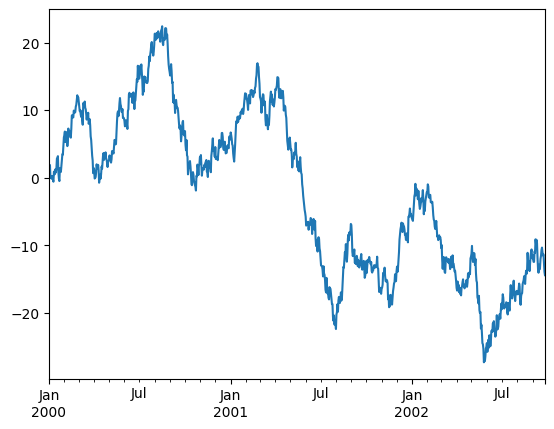

In [108]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

cumsum은 누적합계를 해주는 메소드인듯하다   
https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html

<Figure size 640x480 with 0 Axes>

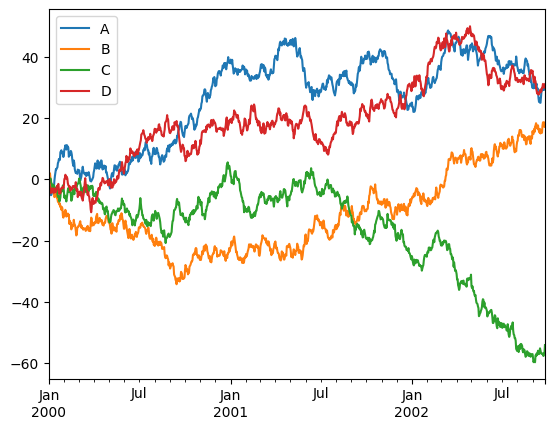

In [109]:
df = pd.DataFrame(
    np.random.randn(1000,4), index=ts.index, columns=["A", "B", "C", "D" ]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

파이썬에서느 일반적으로 세미콜론 안 적는 듯한데 왜 적어준지 모르겠음    
https://chat.openai.com/share/4ae0e28e-30a6-4f04-bf75-6eb8dfc91ec1

# Importing and exporting data (2024-02-06)

## CSV

In [110]:
df = pd.DataFrame(np.random.randint(0,5,(10,5)))
df.to_csv("foo.csv")

In [111]:
pd.read_csv("foo.csv") 

,Unnamed: 0,0,1,2,3,4
0,0,0,1,2,1,4
1,1,1,4,0,3,4
2,2,4,1,0,1,3
3,3,4,0,1,2,1
4,4,1,4,2,0,2
5,5,4,0,1,1,1
6,6,1,2,1,4,4
7,7,1,2,0,1,1
8,8,1,4,4,1,3
9,9,2,3,4,1,1


주의 할점:  
CSV 형식으로 부터 읽어올 때 주의할 점은 기존 행 인덱스를 인식하지 못하고 행 인덱스를 가지는 새로운 열이 추가로 잡힌다는 것입니다.   
따라서 저장할 당시에는 4개였던 열의 개수가 5개가 되어있는 것을 확인할 수 있습니다.      
이를 해결하기 위해서 저장할 떄 index_rabel=False를 해주면 제외하고 저장할 수 있다
아니면 불러올 때 index_col=0를 통해 첫번째 열을 인덱스로 사용하여 저장된 인덱스를 그냥 바로 사용하도록 설정해줄 수도 있다

## Parquet

In [112]:
df.to_parquet("foo.parquet")

In [113]:
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,0,1,2,1,4
1,1,4,0,3,4
2,4,1,0,1,3
3,4,0,1,2,1
4,1,4,2,0,2
5,4,0,1,1,1
6,1,2,1,4,4
7,1,2,0,1,1
8,1,4,4,1,3
9,2,3,4,1,1


## HDF5

In [114]:
# df.to_hdf('foo.h5', 'df') #모듈 추가 설치해야하는듯한데 쓸일없을듯하여 패스하였다

### 그냥 실행시 실패 추가로 모듈 설치해줘야하는 듯 
(그래서 pytalbes라는 것을 설치해야 쓸 수 있을 듯한데 당장 쓸일없을듯하여 패스하였다)

{
	"name": "ImportError",
	"message": "Missing optional dependency 'pytables'.  Use pip or conda to install pytables.",
	"stack": "---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\compat\\_optional.py:142, in import_optional_dependency(name, extra, errors, min_version)
    141 try:
--> 142     module = importlib.import_module(name)
    143 except ImportError:

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\importlib\\__init__.py:127, in import_module(name, package)
    126         level += 1
--> 127 return _bootstrap._gcd_import(name[level:], package, level)

File <frozen importlib._bootstrap>:1014, in _gcd_import(name, package, level)

File <frozen importlib._bootstrap>:991, in _find_and_load(name, import_)

File <frozen importlib._bootstrap>:973, in _find_and_load_unlocked(name, import_)

ModuleNotFoundError: No module named 'tables'

During handling of the above exception, another exception occurred:

ImportError                               Traceback (most recent call last)
Cell In[115], line 1
----> 1 df.to_hdf('foo.h5', 'df')

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\core\\generic.py:2682, in NDFrame.to_hdf(self, path_or_buf, key, mode, complevel, complib, append, format, index, min_itemsize, nan_rep, dropna, data_columns, errors, encoding)
   2678 from pandas.io import pytables
   2680 # Argument 3 to \"to_hdf\" has incompatible type \"NDFrame\"; expected
   2681 # \"Union[DataFrame, Series]\" [arg-type]
-> 2682 pytables.to_hdf(
   2683     path_or_buf,
   2684     key,
   2685     self,  # type: ignore[arg-type]
   2686     mode=mode,
   2687     complevel=complevel,
   2688     complib=complib,
   2689     append=append,
   2690     format=format,
   2691     index=index,
   2692     min_itemsize=min_itemsize,
   2693     nan_rep=nan_rep,
   2694     dropna=dropna,
   2695     data_columns=data_columns,
   2696     errors=errors,
   2697     encoding=encoding,
   2698 )

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\io\\pytables.py:302, in to_hdf(path_or_buf, key, value, mode, complevel, complib, append, format, index, min_itemsize, nan_rep, dropna, data_columns, errors, encoding)
    300 path_or_buf = stringify_path(path_or_buf)
    301 if isinstance(path_or_buf, str):
--> 302     with HDFStore(
    303         path_or_buf, mode=mode, complevel=complevel, complib=complib
    304     ) as store:
    305         f(store)
    306 else:

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\io\\pytables.py:560, in HDFStore.__init__(self, path, mode, complevel, complib, fletcher32, **kwargs)
    557 if \"format\" in kwargs:
    558     raise ValueError(\"format is not a defined argument for HDFStore\")
--> 560 tables = import_optional_dependency(\"tables\")
    562 if complib is not None and complib not in tables.filters.all_complibs:
    563     raise ValueError(
    564         f\"complib only supports {tables.filters.all_complibs} compression.\"
    565     )

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\compat\\_optional.py:145, in import_optional_dependency(name, extra, errors, min_version)
    143 except ImportError:
    144     if errors == \"raise\":
--> 145         raise ImportError(msg)
    146     return None
    148 # Handle submodules: if we have submodule, grab parent module from sys.modules

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables."
}

## 생소한 파일 형식자들에 대한 gpt 답변 (+pickle)
https://chat.openai.com/share/ee9a3e69-bbd0-44c0-8e95-bf87a586f75c

## Excel

In [115]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [116]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,0,1,2,1,4
1,1,1,4,0,3,4
2,2,4,1,0,1,3
3,3,4,0,1,2,1
4,4,1,4,2,0,2
5,5,4,0,1,1,1
6,6,1,2,1,4,4
7,7,1,2,0,1,1
8,8,1,4,4,1,3
9,9,2,3,4,1,1


# Gotchas (2024-02-07)

In [117]:
# if pd.Series([False, True, False]):
#      print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

{
	"name": "ValueError",
	"message": "The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().",
	"stack": "---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[117], line 1
----> 1 if pd.Series([False, True, False]):
      2      print(\"I was true\")

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\core\\generic.py:1466, in NDFrame.__nonzero__(self)
   1464 @final
   1465 def __nonzero__(self) -> NoReturn:
-> 1466     raise ValueError(
   1467         f\"The truth value of a {type(self).__name__} is ambiguous. \"
   1468         \"Use a.empty, a.bool(), a.item(), a.any() or a.all().\"
   1469     )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()."
}

# 이로써 한번 완독?완타가 끝났다